# Curvilineargrid Basics

This is the basic introduction for using `meshkernel` library for generating curvilinear grids.

At the very beginning, the necessary libraries have to be imported.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import CurvilinearParameters, GeometryList, MeshKernel, SplinesToCurvilinearParameters

## Generate a curvilinear grid using the transfinite interpolation method

We first create the splines for curvilinear grid generation. Each spline is separated by -999.0 separator

In [20]:
separator = -999.0
splines_x = np.array([2.172341E+02, 4.314185E+02, 8.064374E+02, separator,
                      2.894012E+01, 2.344944E+02, 6.424647E+02, separator,
                      2.265137E+00, 2.799988E+02, separator,
                      5.067361E+02, 7.475956E+02], dtype=np.double)
splines_y = np.array([-2.415445E+01, 1.947381E+02, 3.987241E+02, separator,
                      2.010146E+02, 3.720490E+02, 5.917262E+02, separator,
                      2.802553E+02, -2.807726E+01, separator,
                      6.034946E+02, 3.336055E+02], dtype=np.double)
splines_values = np.zeros_like(splines_x)
splines = GeometryList(splines_x, splines_y, splines_values)

Set the number of m and n in a new CurvilinearParameters instance

In [21]:
curvilinearParameters = CurvilinearParameters()
curvilinearParameters.n_refinement = 40
curvilinearParameters.m_refinement = 20

Create a new instance of the MeshKernel library

In [22]:
mk = MeshKernel()

Use the transfinite algorithm to create a new curvilinear grid

In [23]:
mk.curvilinear_compute_transfinite_from_splines(splines, curvilinearParameters)
curvilinear_grid_transfinite = mk.curvilineargrid_get()

Plot the result

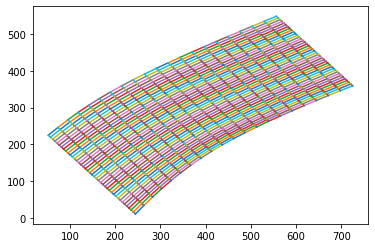

In [24]:
fig, ax = plt.subplots()
curvilinear_grid_transfinite.plot_edges(ax)

## Generate a curvilinear grid using the advancing front method

We first create the splines for curvilinear grid generation. Each spline is separated by -999.0 separator

In [25]:
separator = -999.0
splines_x = np.array([152.001571655273, 374.752960205078, 850.255920410156, separator,
                      72.5010681152344, 462.503479003906, separator], dtype=np.double)
splines_y = np.array([86.6264953613281, 336.378997802734, 499.130676269531, separator,
                      391.129577636719, 90.3765411376953, separator], dtype=np.double)

splines_values = np.zeros_like(splines_x)
splines = GeometryList(splines_x, splines_y, splines_values)

Set the number of m and n in a new CurvilinearParameters instance

In [26]:
curvilinearParameters = CurvilinearParameters()
curvilinearParameters.n_refinement = 40
curvilinearParameters.m_refinement = 20

Set the additional parameters required for generating a curvilinear grid from splines using the advancing front method

In [32]:
splinesToCurvilinearParameters = SplinesToCurvilinearParameters()
splinesToCurvilinearParameters.aspect_ratio = 0.1
splinesToCurvilinearParameters.aspect_ratio_grow_factor = 1.1
splinesToCurvilinearParameters.average_width = 50.0
splinesToCurvilinearParameters.nodes_on_top_of_each_other_tolerance = 1e-4
splinesToCurvilinearParameters.min_cosine_crossing_angles = 0.95
splinesToCurvilinearParameters.check_front_collisions = 0
splinesToCurvilinearParameters.curvature_adapted_grid_spacing = 1
splinesToCurvilinearParameters.remove_skinny_triangles = 0

Use the advancing front algorithm to create a new curvilinear grid

In [33]:
mk.curvilinear_compute_orthogonal_from_splines(splines, curvilinearParameters, splinesToCurvilinearParameters)
curvilinear_grid_orthogonal = mk.curvilineargrid_get()

Plot the result

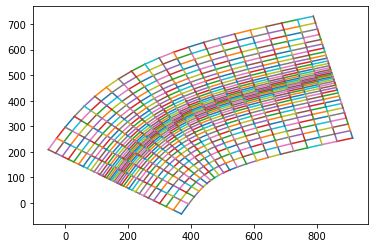

In [34]:
fig, ax = plt.subplots()
curvilinear_grid_orthogonal.plot_edges(ax)